<a href="https://colab.research.google.com/github/Samhitha1504-007/Stock-Price-Prediction_Tensorflow/blob/main/PROJECTIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf


In [ ]:
data = pd.read_csv('HCLTECH.csv')
data.to_hdf('processed_HCLTECH.csv', key='df', mode='w')
print(data.head())

         Date   Symbol Series  Prev Close    Open     High      Low     Last  \
0  11-01-2000  HCLTECH     EQ      580.00  1550.0  1725.00  1492.00  1560.00   
1  12-01-2000  HCLTECH     EQ     1554.45  1560.0  1678.85  1560.00  1678.85   
2  13-01-2000  HCLTECH     EQ     1678.85  1790.0  1813.20  1781.00  1813.20   
3  14-01-2000  HCLTECH     EQ     1813.20  1958.3  1958.30  1835.00  1958.30   
4  17-01-2000  HCLTECH     EQ     1958.30  2115.0  2115.00  1801.65  1801.65   

     Close     VWAP   Volume      Turnover  Trades  Deliverable Volume  \
0  1554.45  1582.72  1192200  1.886910e+14     NaN                 NaN   
1  1678.85  1657.05   344850  5.714350e+13     NaN                 NaN   
2  1813.20  1804.69    53000  9.564880e+12     NaN                 NaN   
3  1958.30  1939.90   270950  5.256170e+13     NaN                 NaN   
4  1801.65  1990.55   428800  8.535470e+13     NaN                 NaN   

   %Deliverble  
0          NaN  
1          NaN  
2          NaN  
3     

In [ ]:
data_clean = data.dropna()
print(data_clean.head())

            Date   Symbol Series  Prev Close    Open    High     Low    Last  \
2844  01-06-2011  HCLTECH     EQ      514.80  511.40  516.00  509.00  514.75   
2845  02-06-2011  HCLTECH     EQ      514.40  509.00  515.25  508.70  514.75   
2846  03-06-2011  HCLTECH     EQ      513.70  512.05  517.50  508.90  513.70   
2847  06-06-2011  HCLTECH     EQ      512.35  508.05  514.00  505.05  509.10   
2848  07-06-2011  HCLTECH     EQ      509.50  504.05  514.95  504.05  511.95   

       Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
2844  514.40  512.70  287699  1.475040e+13  4845.0            146731.0   
2845  513.70  512.86  307689  1.578030e+13  6701.0            144265.0   
2846  512.35  513.58  379167  1.947330e+13  9447.0            143384.0   
2847  509.50  508.07  285294  1.449490e+13  5368.0            100251.0   
2848  511.80  510.77  403694  2.061970e+13  8530.0            262636.0   

      %Deliverble  
2844       0.5100  
2845       0.4689  
2846       0.3

In [ ]:
data['Close'].interpolate(method='linear', inplace=True)


<ipython-input-5-cba21d967b18>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Close'].interpolate(method='linear', inplace=True)


In [ ]:
data.dropna(inplace=True)
print(data.head())

            Date   Symbol Series  Prev Close    Open    High     Low    Last  \
2844  01-06-2011  HCLTECH     EQ      514.80  511.40  516.00  509.00  514.75   
2845  02-06-2011  HCLTECH     EQ      514.40  509.00  515.25  508.70  514.75   
2846  03-06-2011  HCLTECH     EQ      513.70  512.05  517.50  508.90  513.70   
2847  06-06-2011  HCLTECH     EQ      512.35  508.05  514.00  505.05  509.10   
2848  07-06-2011  HCLTECH     EQ      509.50  504.05  514.95  504.05  511.95   

       Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
2844  514.40  512.70  287699  1.475040e+13  4845.0            146731.0   
2845  513.70  512.86  307689  1.578030e+13  6701.0            144265.0   
2846  512.35  513.58  379167  1.947330e+13  9447.0            143384.0   
2847  509.50  508.07  285294  1.449490e+13  5368.0            100251.0   
2848  511.80  510.77  403694  2.061970e+13  8530.0            262636.0   

      %Deliverble  
2844       0.5100  
2845       0.4689  
2846       0.3

In [ ]:
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_200'] = data['Close'].rolling(window=200).mean()


In [ ]:
delta = data['Close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(window=14).mean()
avg_loss = loss.rolling(window=14).mean()
rs = avg_gain / avg_loss
data['RSI'] = 100 - (100 / (1 + rs))
print(data_clean.head())

            Date   Symbol Series  Prev Close    Open    High     Low    Last  \
2844  01-06-2011  HCLTECH     EQ      514.80  511.40  516.00  509.00  514.75   
2845  02-06-2011  HCLTECH     EQ      514.40  509.00  515.25  508.70  514.75   
2846  03-06-2011  HCLTECH     EQ      513.70  512.05  517.50  508.90  513.70   
2847  06-06-2011  HCLTECH     EQ      512.35  508.05  514.00  505.05  509.10   
2848  07-06-2011  HCLTECH     EQ      509.50  504.05  514.95  504.05  511.95   

       Close    VWAP  Volume      Turnover  Trades  Deliverable Volume  \
2844  514.40  512.70  287699  1.475040e+13  4845.0            146731.0   
2845  513.70  512.86  307689  1.578030e+13  6701.0            144265.0   
2846  512.35  513.58  379167  1.947330e+13  9447.0            143384.0   
2847  509.50  508.07  285294  1.449490e+13  5368.0            100251.0   
2848  511.80  510.77  403694  2.061970e+13  8530.0            262636.0   

      %Deliverble  
2844       0.5100  
2845       0.4689  
2846       0.3

In [ ]:
data_clean = data.dropna()
print(data_clean.head())

            Date   Symbol Series  Prev Close    Open    High     Low    Last  \
3043  2012-03-19  HCLTECH     EQ      497.15  494.05  502.45  488.00  499.00   
3044  2012-03-20  HCLTECH     EQ      498.95  499.00  500.95  485.70  489.00   
3045  2012-03-21  HCLTECH     EQ      492.00  489.50  497.00  487.95  492.00   
3046  2012-03-22  HCLTECH     EQ      491.85  492.00  495.85  469.50  477.00   
3047  2012-03-23  HCLTECH     EQ      477.00  480.80  488.90  475.50  484.55   

       Close    VWAP   Volume      Turnover   Trades  Deliverable Volume  \
3043  498.95  495.08  2907052  1.439219e+14  13091.0           2606526.0   
3044  492.00  495.87   502713  2.492800e+13   7055.0            334198.0   
3045  491.85  492.32   655722  3.228242e+13  24199.0            391253.0   
3046  477.00  481.13  1290270  6.207916e+13  40877.0            799038.0   
3047  484.95  484.47  2696410  1.306323e+14  11187.0           2437121.0   

      %Deliverble     MA_20     MA_200        RSI  
3043      

In [ ]:
data['MACD'] = data['Close'].ewm(span=12).mean() - data['Close'].ewm(span=26).mean()
data['Prev_Close'] = data['Close'].shift(1)
data['Prev_Volume'] = data['Volume'].shift(1)


In [ ]:
data['Return'] = data['Close'].pct_change()
data['Volatility'] = data['Close'].rolling(window=30).std()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data[['Close', 'Volume']] = scaler.fit_transform(data[['Close', 'Volume']])

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Close', 'Volume']] = scaler.fit_transform(data[['Close', 'Volume']])


In [ ]:
# Select only the 'Close' column
close_prices = stock_data['Close']

# You can also plot the percentage change in stock price
stock_data['Pct_Change'] = stock_data['Close'].pct_change() * 100


In [ ]:
# Create a lagged version of the Close prices to predict the next day's closing price
stock_data['Lagged Close'] = stock_data['Close'].shift(1)

# Drop the rows with NaN values (which occur after shifting)
stock_data = stock_data.dropna()

# Features and target
X = stock_data[['Lagged Close']]  # Features (previous day's close)
y = stock_data['Close']          # Target (current day's close)

# Now you can use X and y for training your model (e.g., a regression model)


In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

def get_labelled_windows(x, horizon=HORIZON):
    return x[:,:-horizon], x[:, -horizon:]

test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


In [ ]:
def make_windows(x, window_size=7, horizon=1):
    """
    Turns a 1D array into a 2D array of sequential windows of window_size.
    """
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
    windowed_array = x[window_indexes]
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
    return windows, labels


In [ ]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y') # Changed the format string to match the actual format of your dates (day-month-year).
data.set_index('Date', inplace=True)

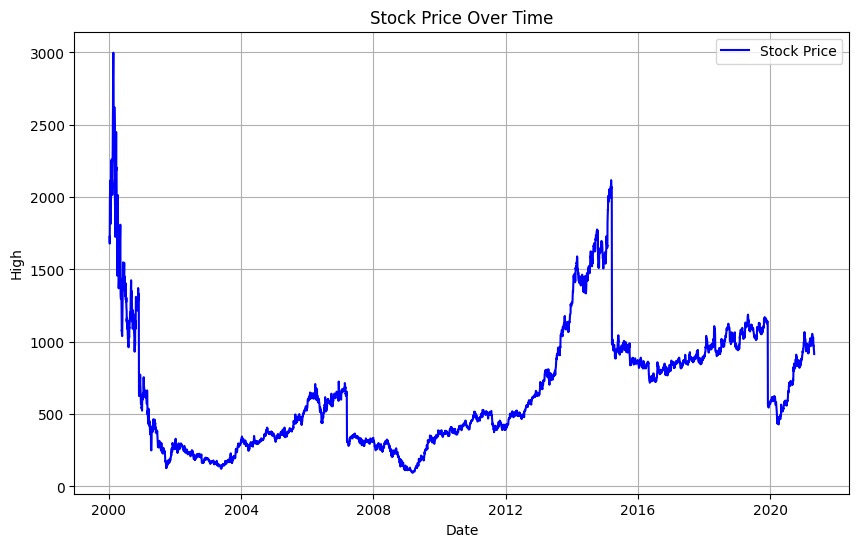

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))  # Set figure size
plt.plot(data.index, data['High'], label='Stock Price', color='b')
plt.title('Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('High')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Build the model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8478 - loss: 0.4901 - val_accuracy: 0.9794 - val_loss: 0.0710
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - accuracy: 0.9815 - loss: 0.0576 - val_accuracy: 0.9824 - val_loss: 0.0545
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9878 - loss: 0.0414 - val_accuracy: 0.9864 - val_loss: 0.0448
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9903 - loss: 0.0293 - val_accuracy: 0.9873 - val_loss: 0.0424
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9926 - loss: 0.0257 - val_accuracy: 0.9858 - val_loss: 0.0479
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9847 - loss: 0.0491
Test accuracy: 0.9873999953269958
